In [1]:
#Librerie utili
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

In [2]:
#Import the residual from 2kr excel sheet
excelSheet=pd.read_excel("../excel/2kr.xlsx")

#Lock only the part regarding residuals in the excel sheet and sto in a new dataframe
residualDataframe=excelSheet.loc[0:7,'y1-ym':'y10-ym']

#Rapid check the new dataframe
print(residualDataframe)



      y1-ym       y2-ym       y3-ym        y4-ym       y5-ym     y6-ym  \
0 -0.075972  -0.0251389   0.0270833   -0.0284722    0.135139  0.036250   
1  0.013194 -0.00847222   0.0134722   -0.0204167    -0.05625 -0.010694   
2  0.052972  -0.0161944   0.0315833   -0.0120278  -0.0459167  0.000750   
3  0.037083  0.00458333  -0.0318056    0.0506944   0.0204167 -0.023750   
4 -0.000722  -0.0401667   0.0228889   0.00955556   0.0445556 -0.040444   
5  0.029500 -0.00105556  0.00561111   -0.0243889      -0.013  0.017833   
6  0.046667 -0.00861111   0.0280556      -0.0025  -0.0394444  0.005000   
7 -0.001556   0.0303889   0.0128889 -0.000166667  0.00122222 -0.031000   

      y7-ym     y8-ym     y9-ym    y10-ym  
0 -0.188750  0.025972  0.076250  0.017639  
1  0.024306  0.010972 -0.014306  0.048194  
2  0.006861  0.018806 -0.027583 -0.009250  
3 -0.003194 -0.013472 -0.041528  0.000972  
4 -0.010722  0.002333  0.021778 -0.009056  
5  0.008389 -0.017167 -0.007167  0.001444  
6  0.003333  0.014167 -0.

/Users/fernandodenitto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


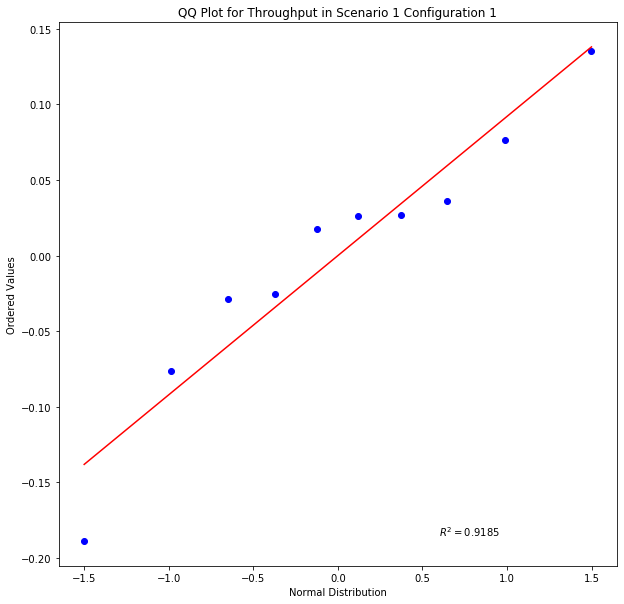

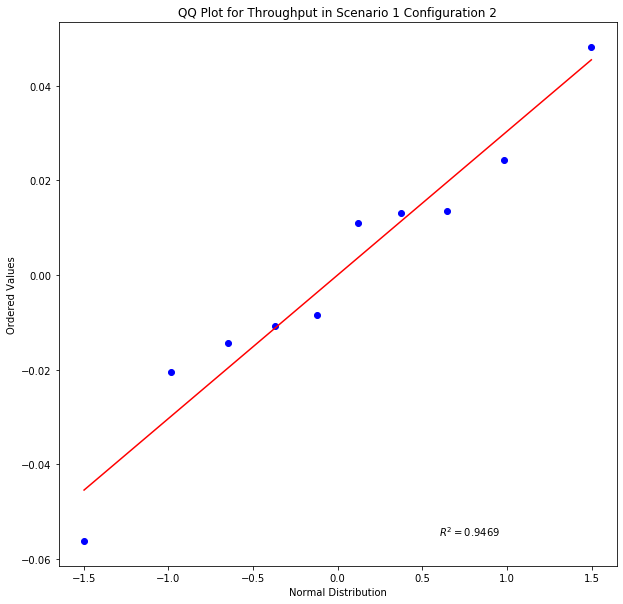

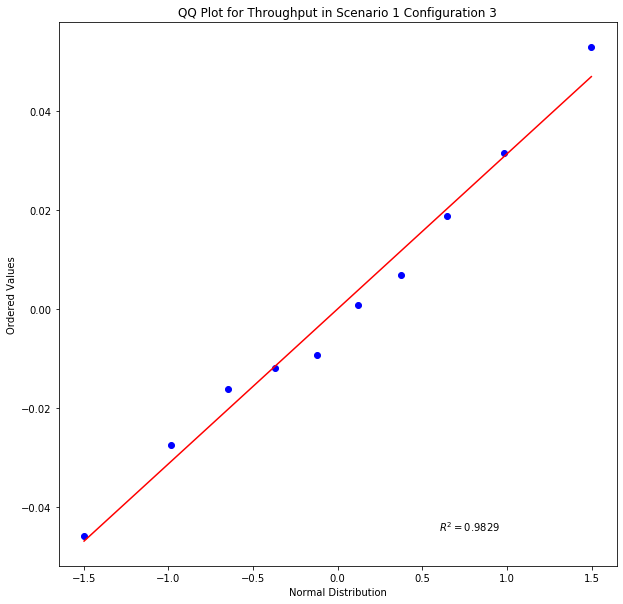

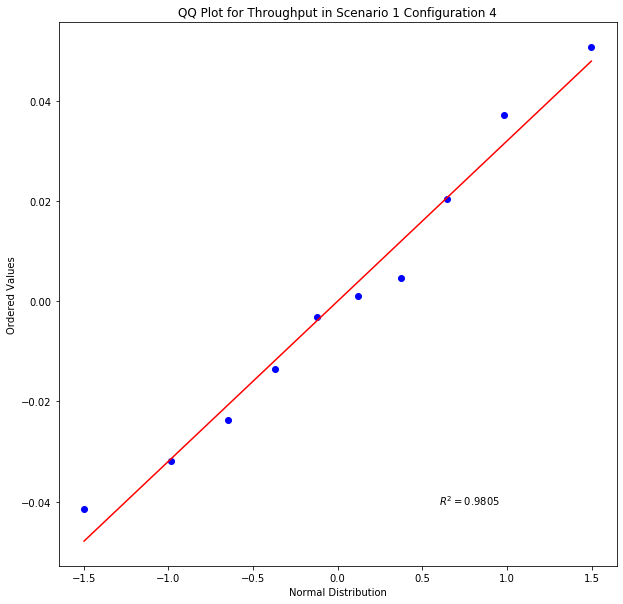

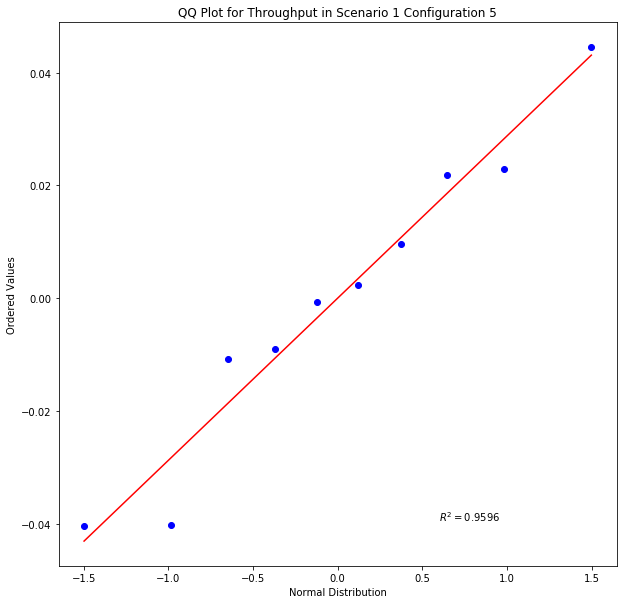

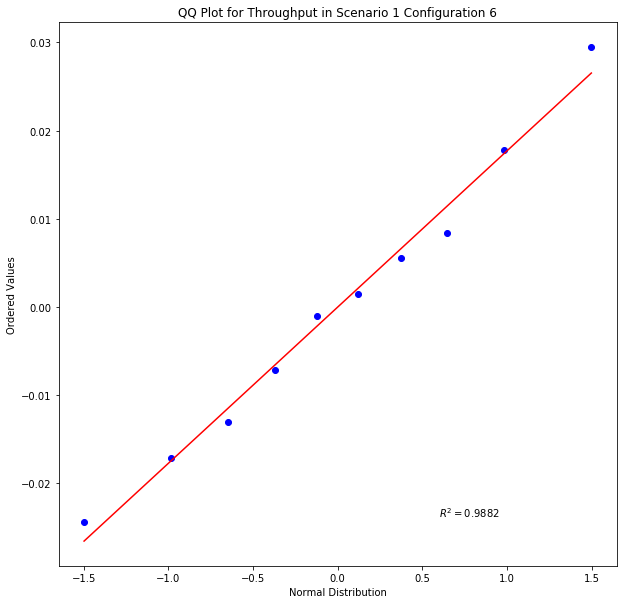

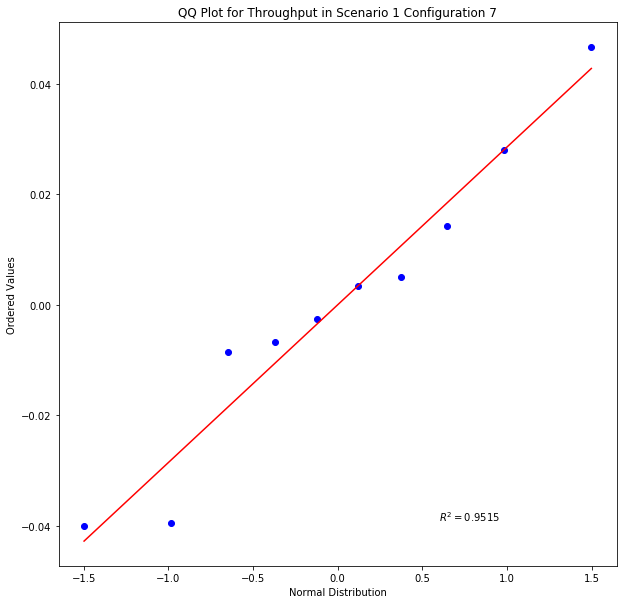

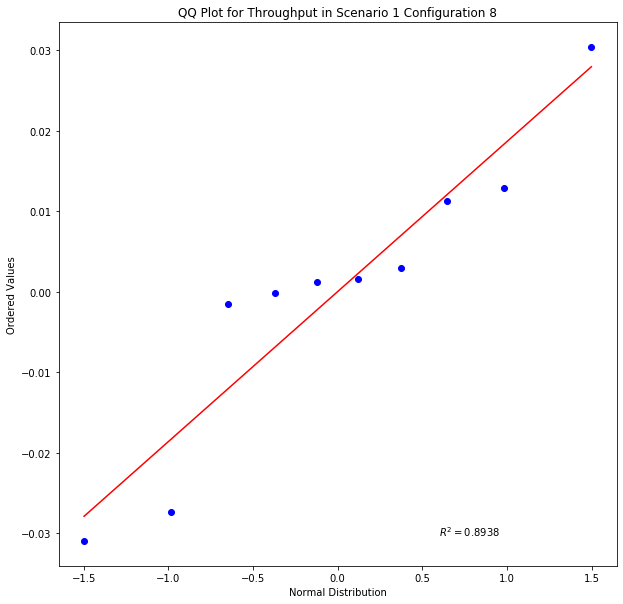

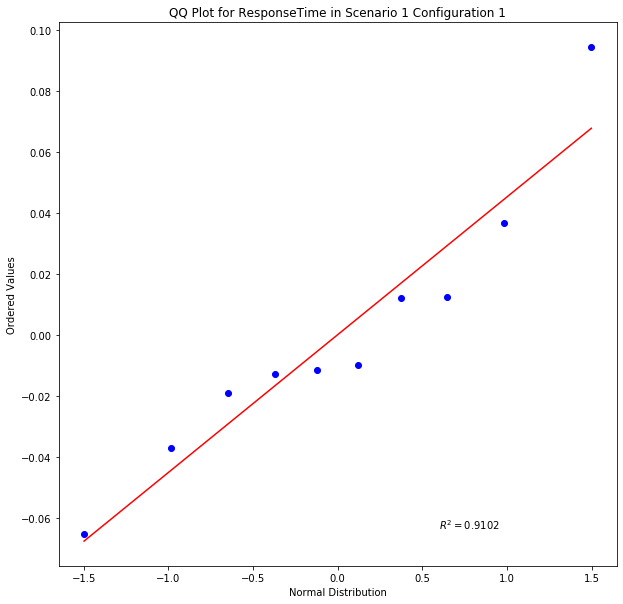

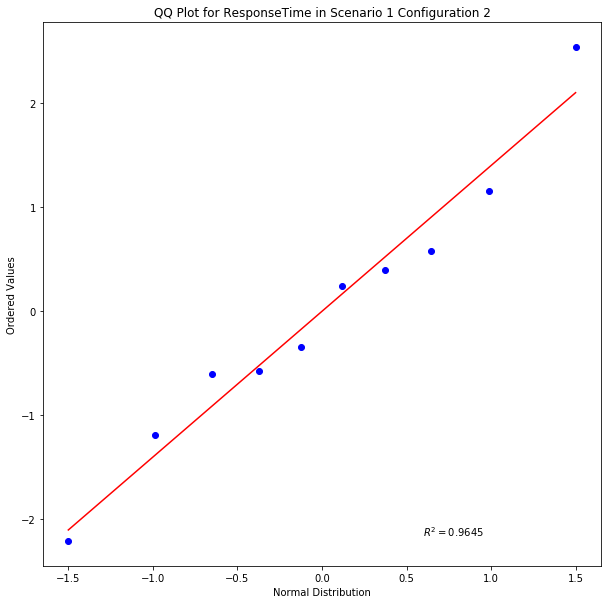

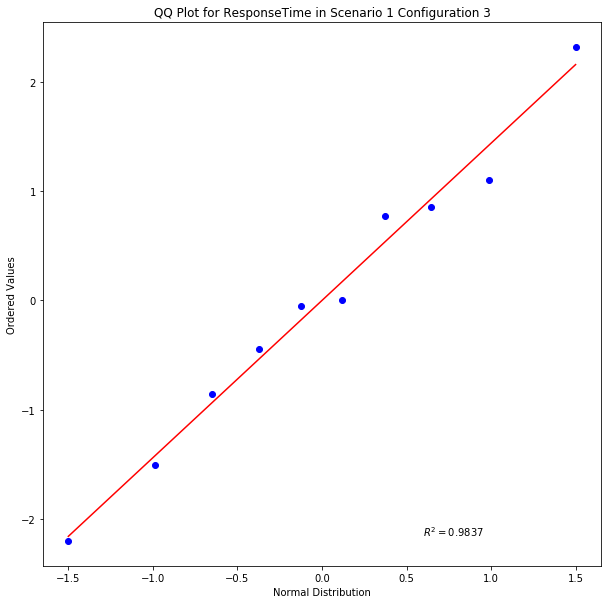

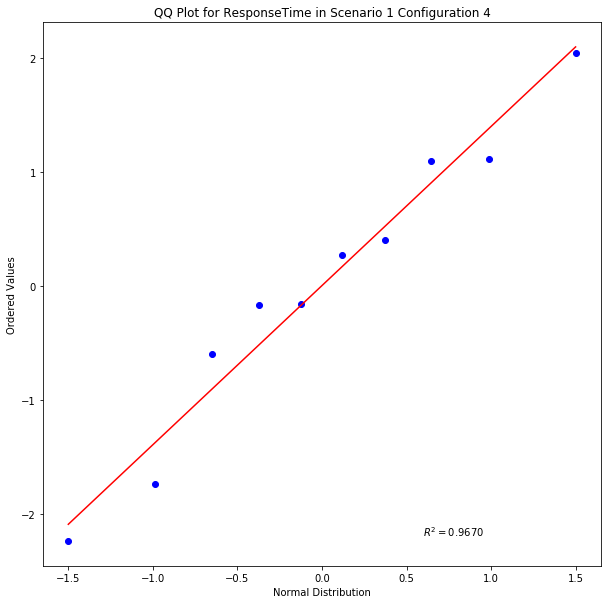

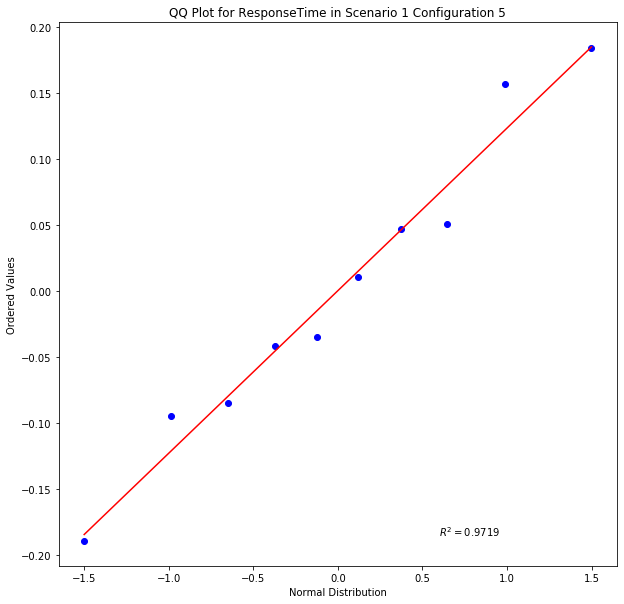

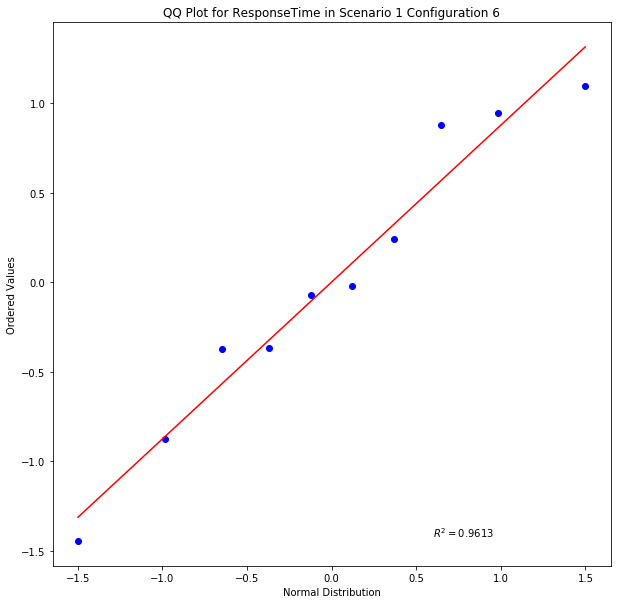

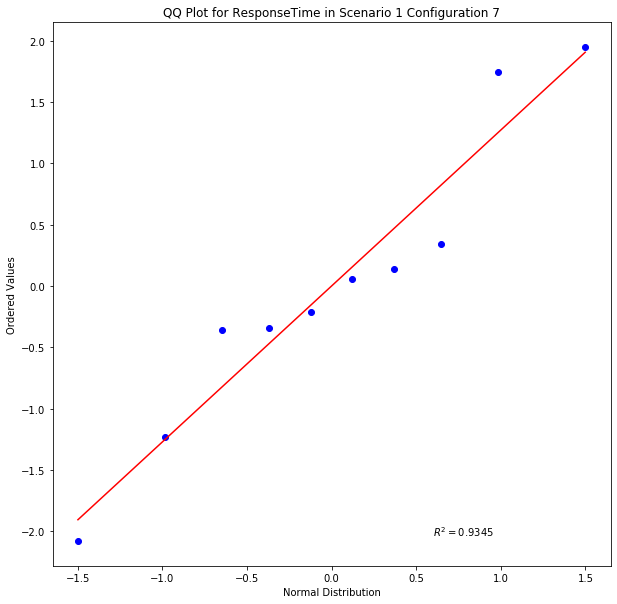

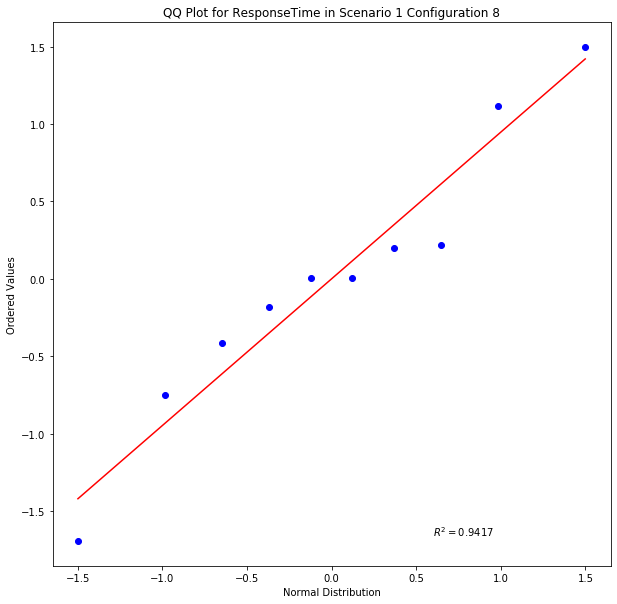

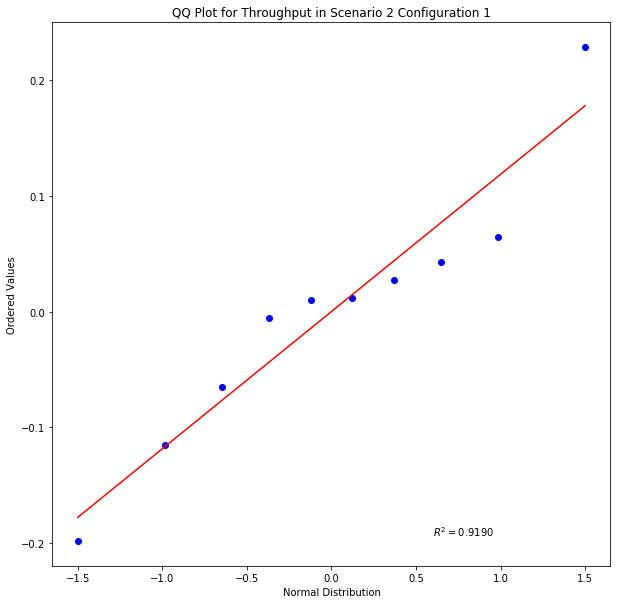

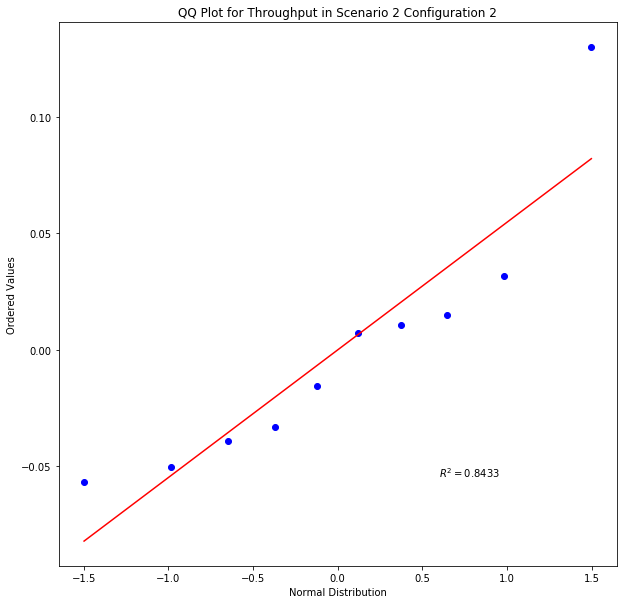

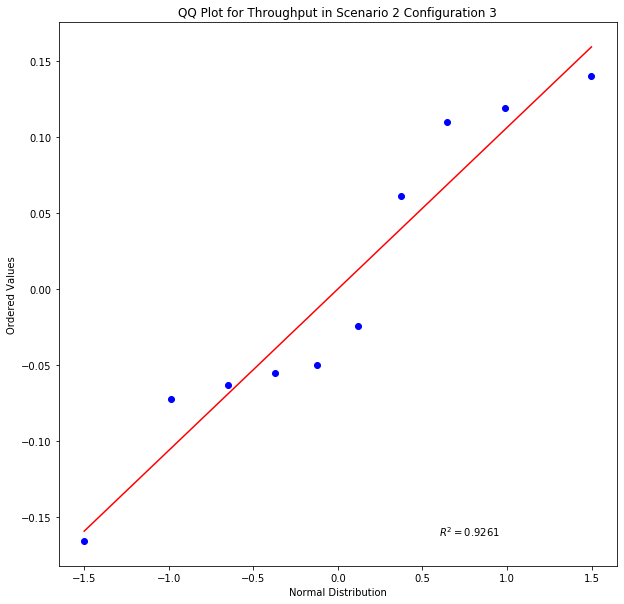

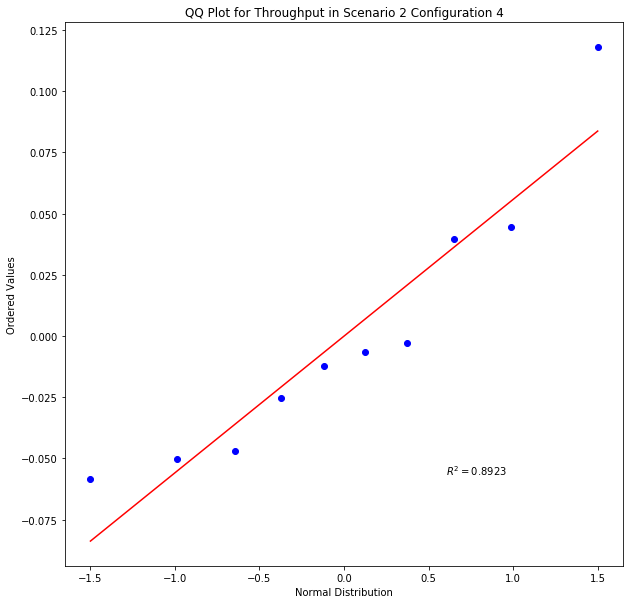

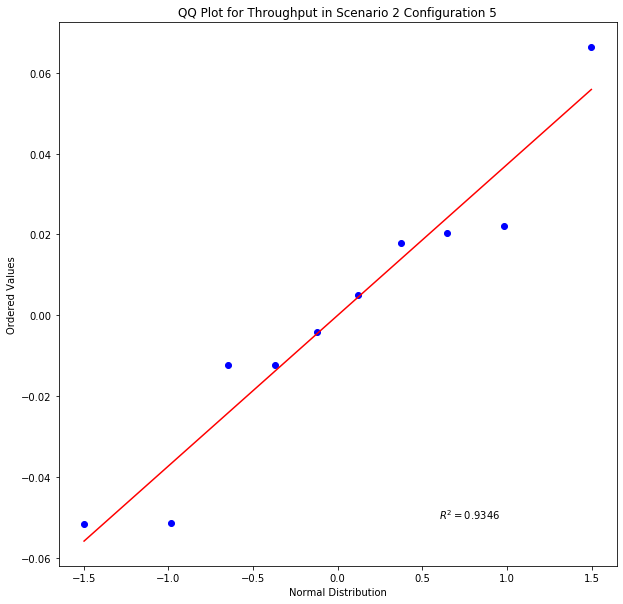

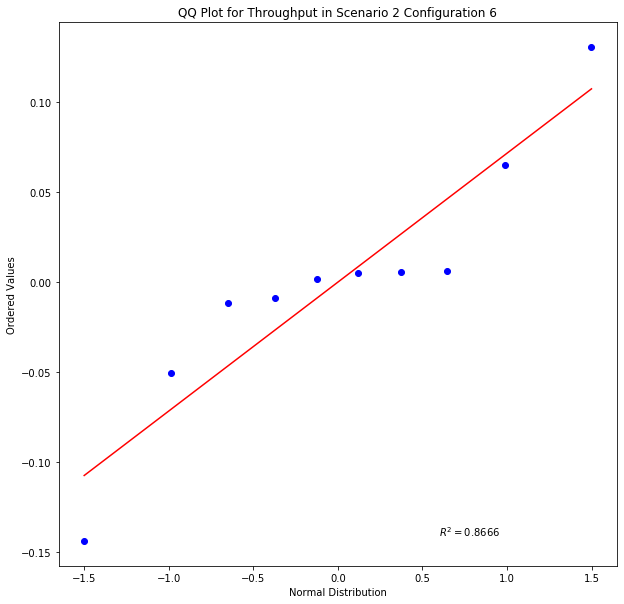

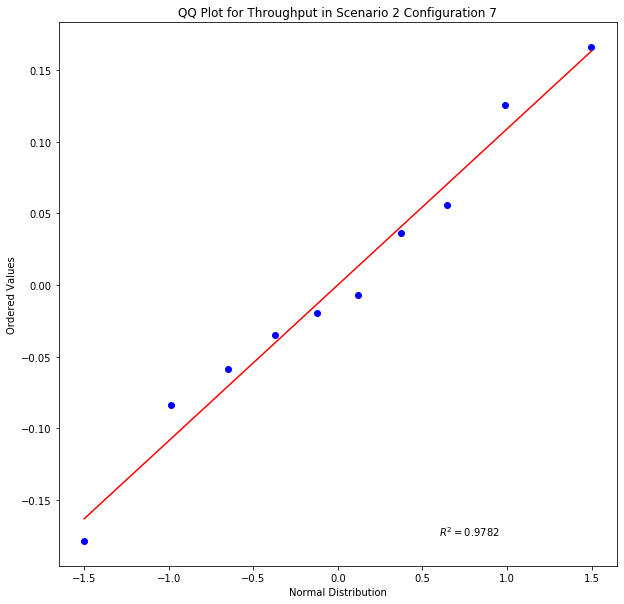

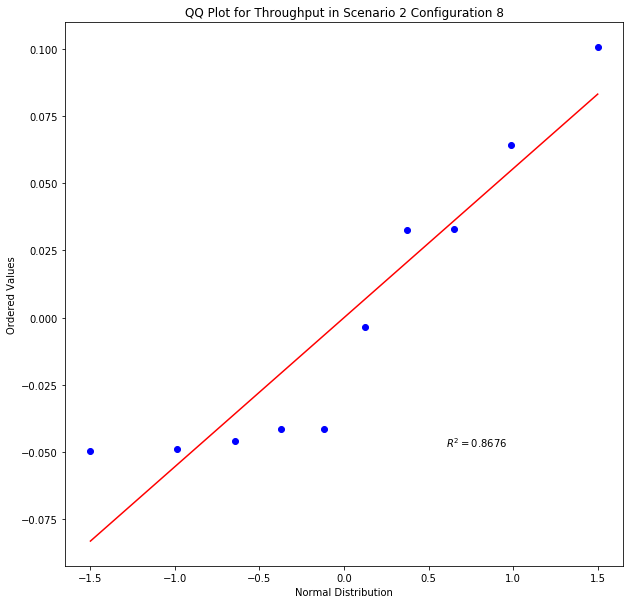

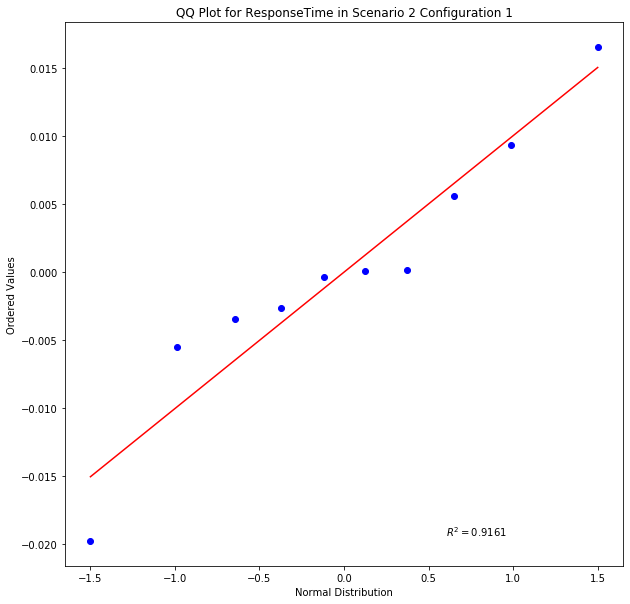

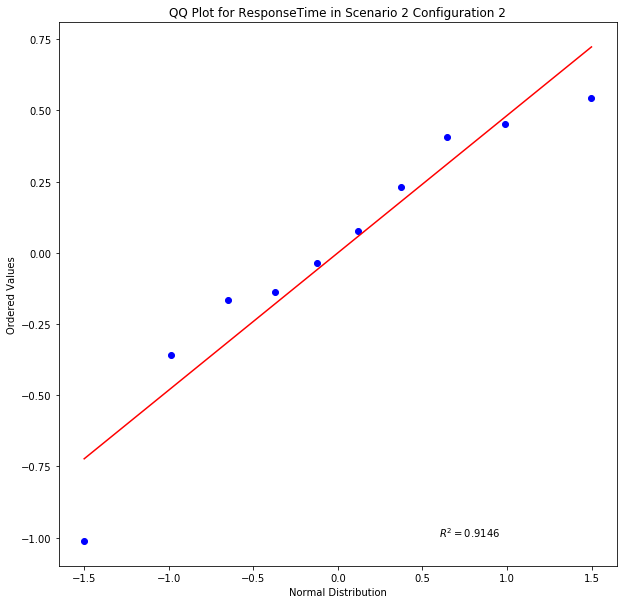

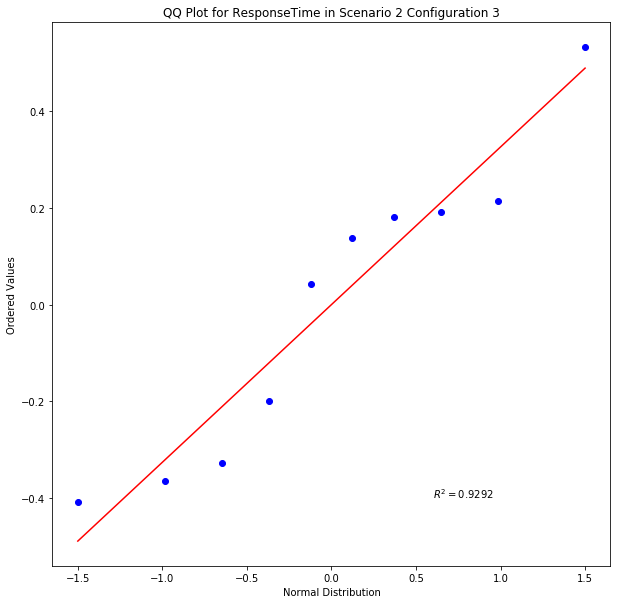

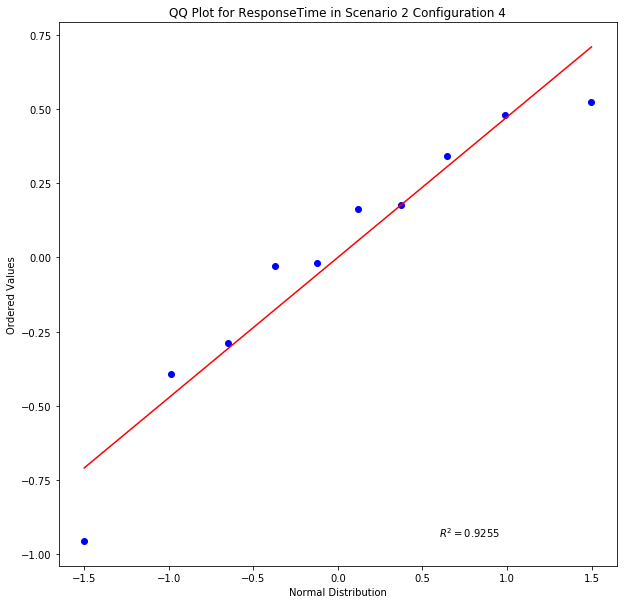

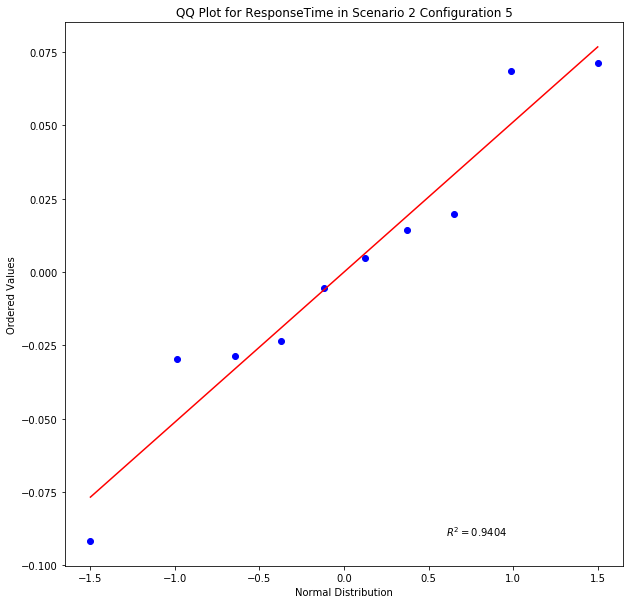

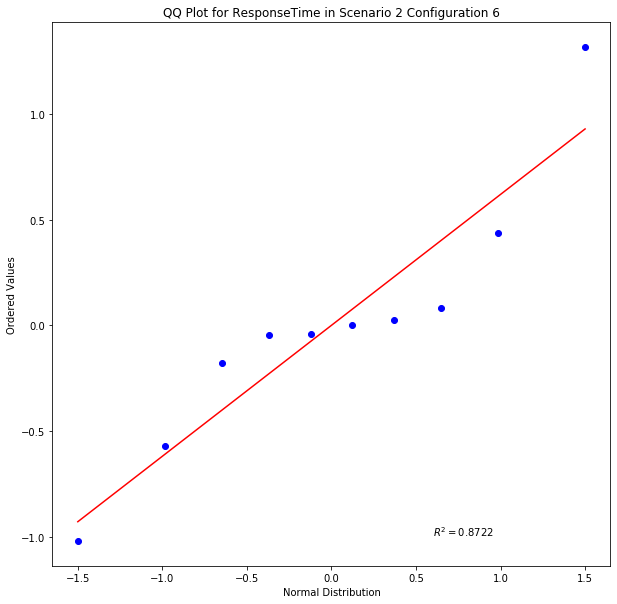

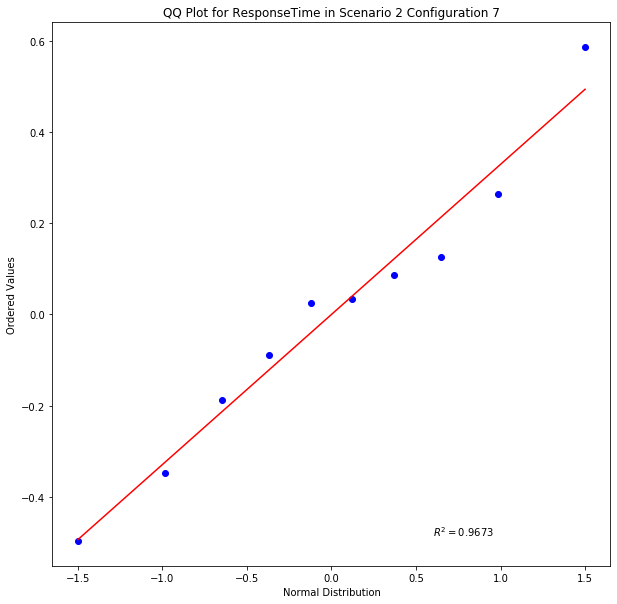

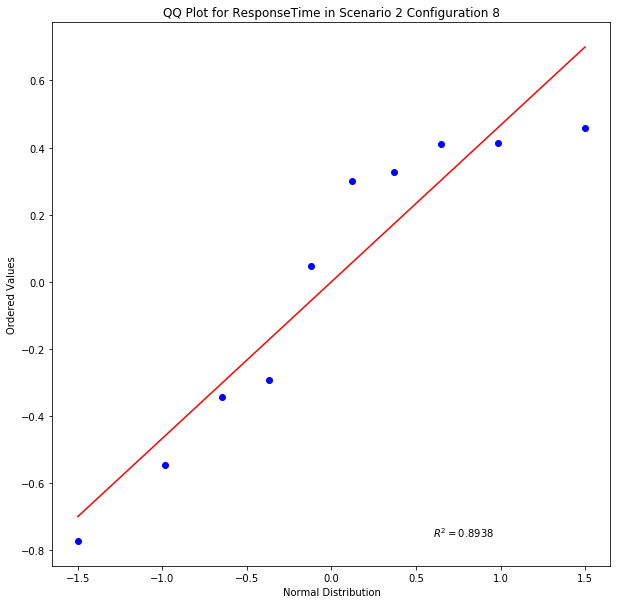

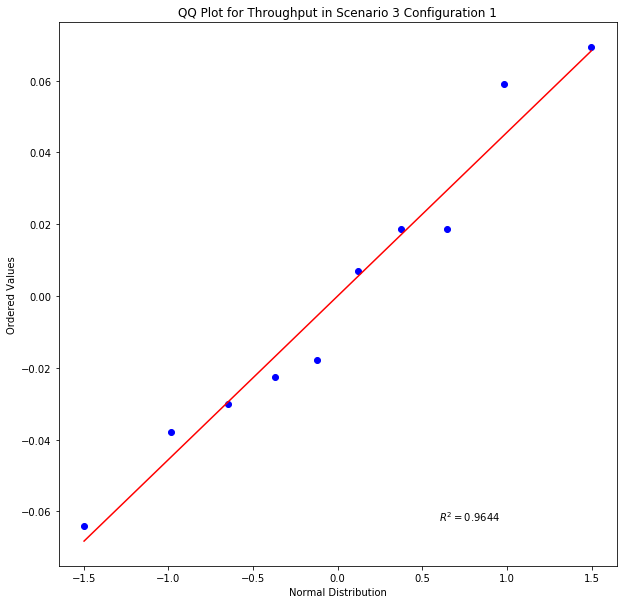

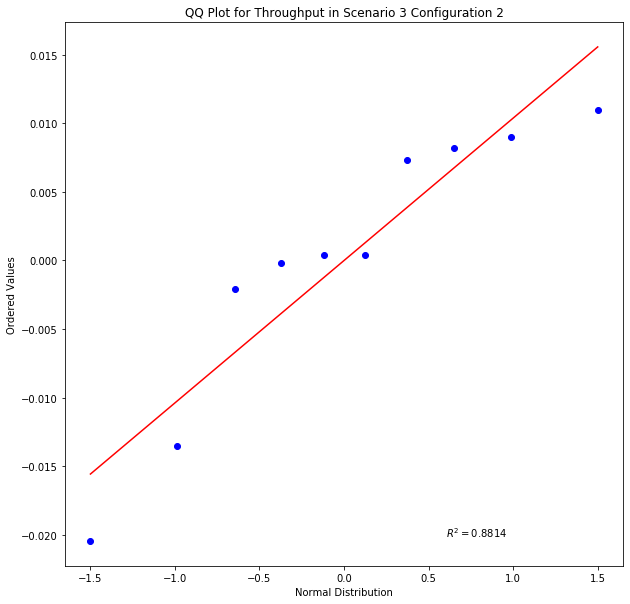

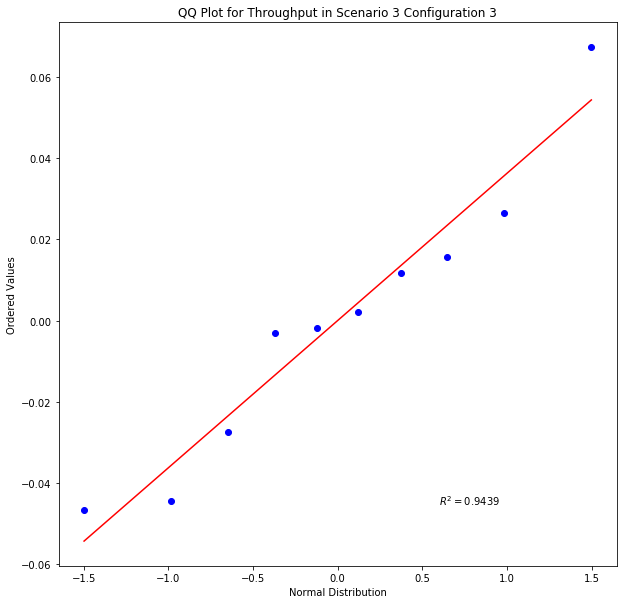

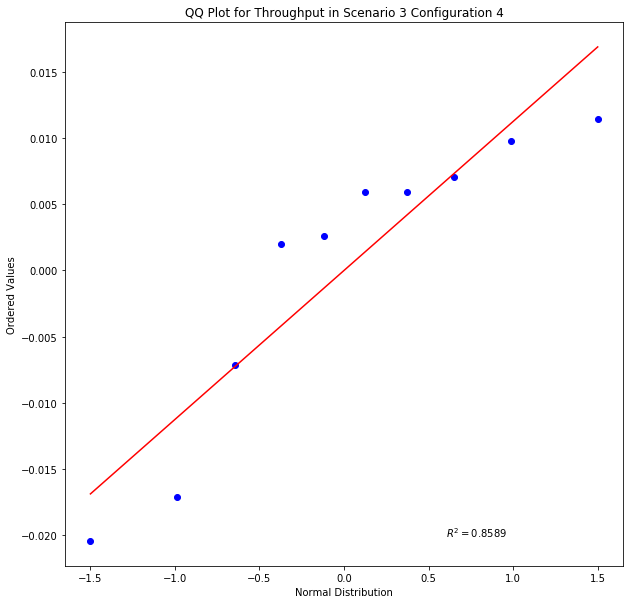

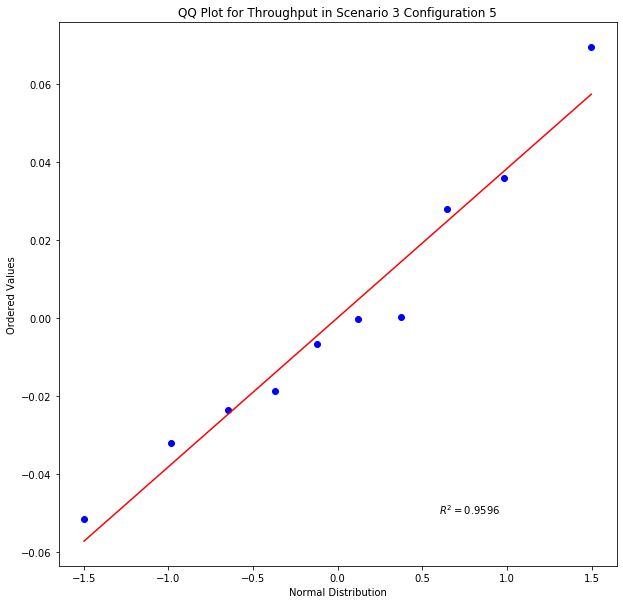

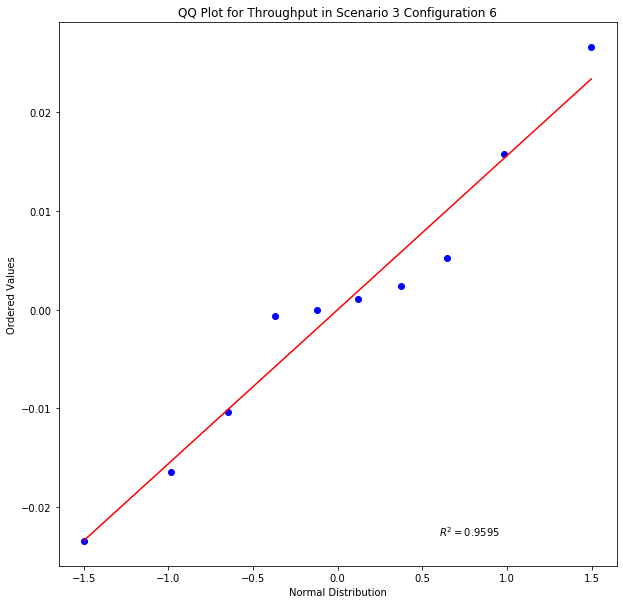

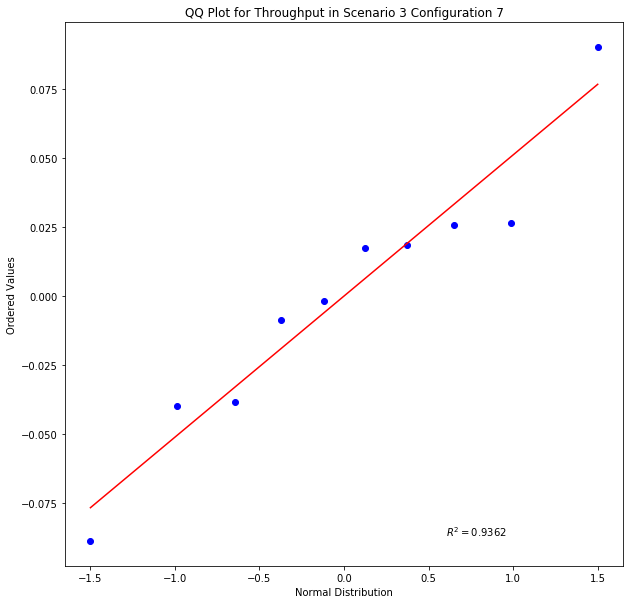

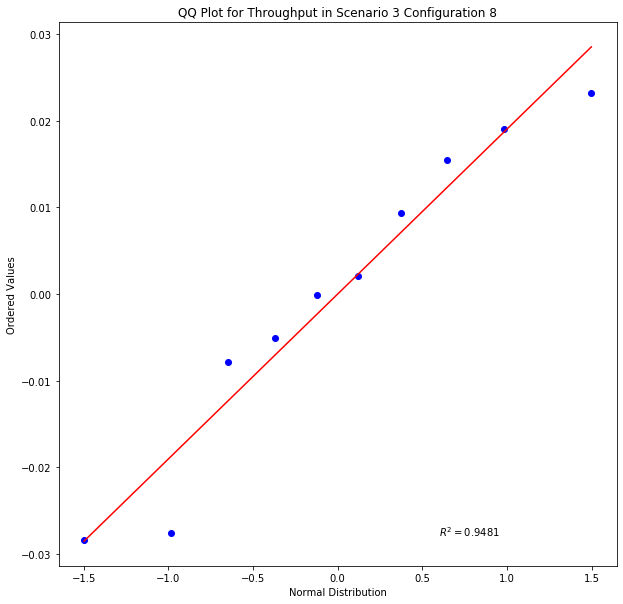

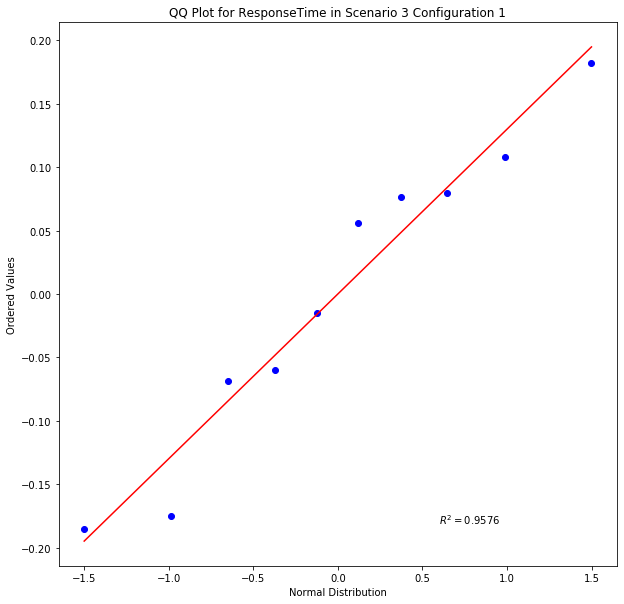

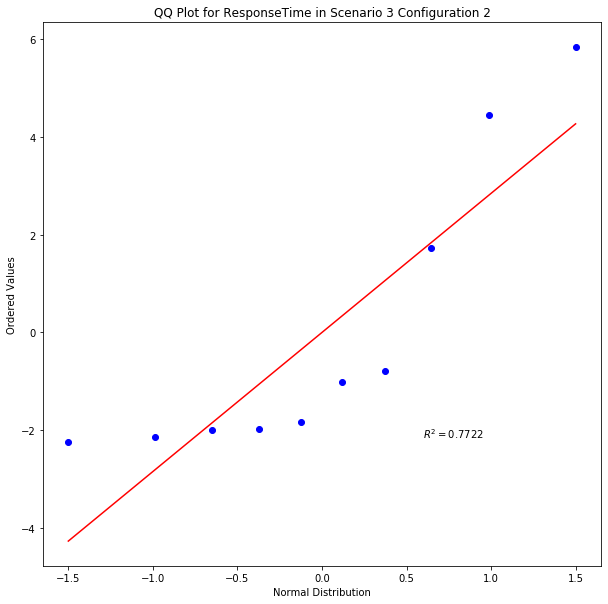

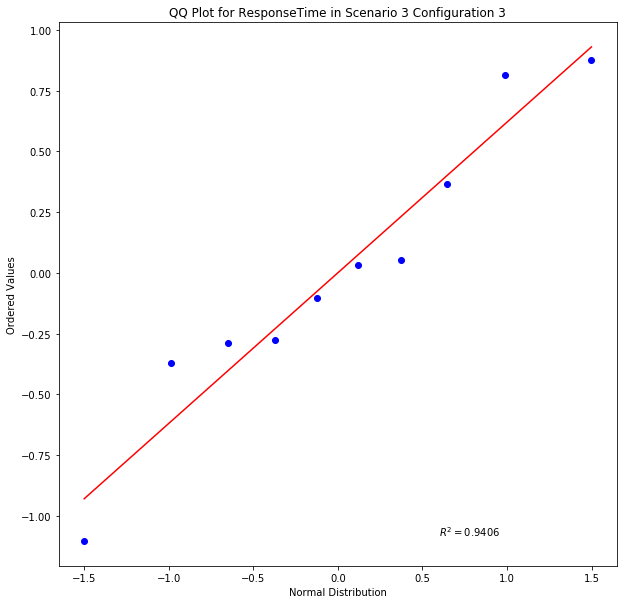

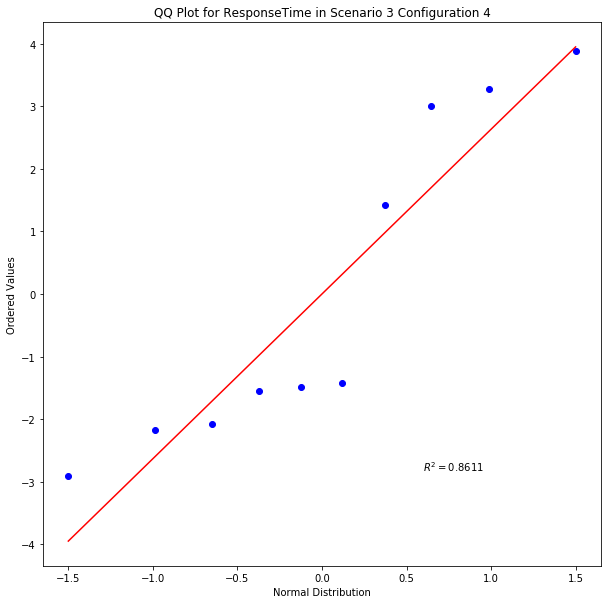

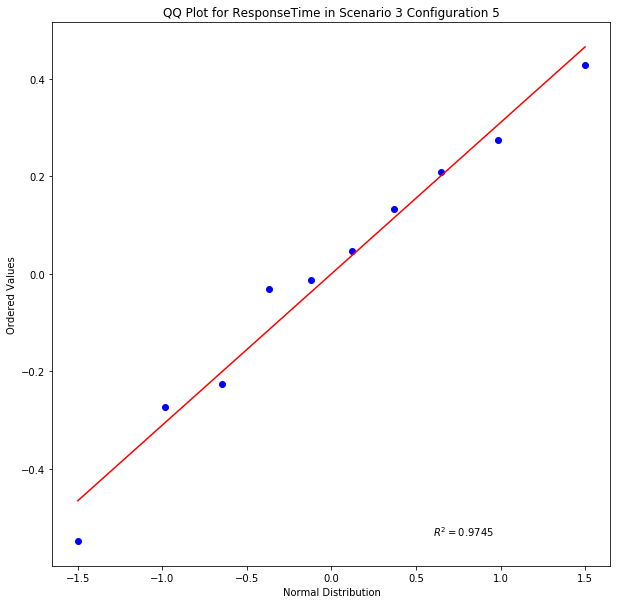

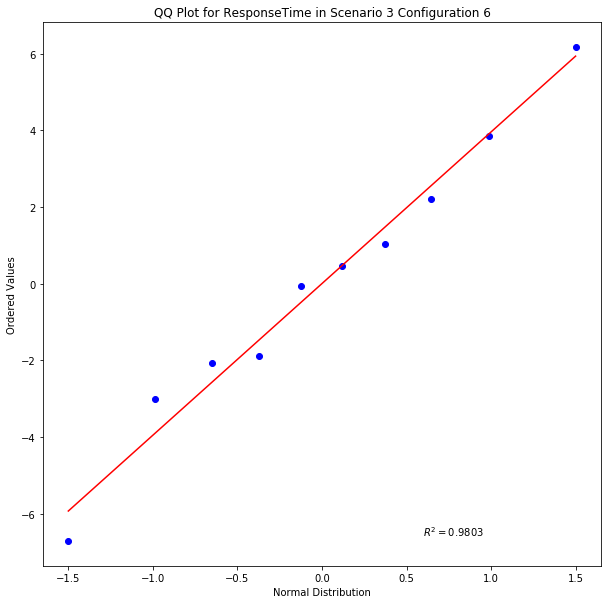

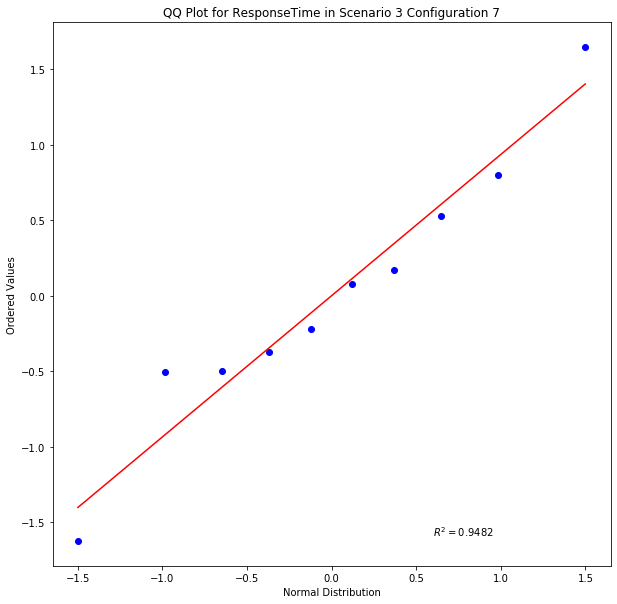

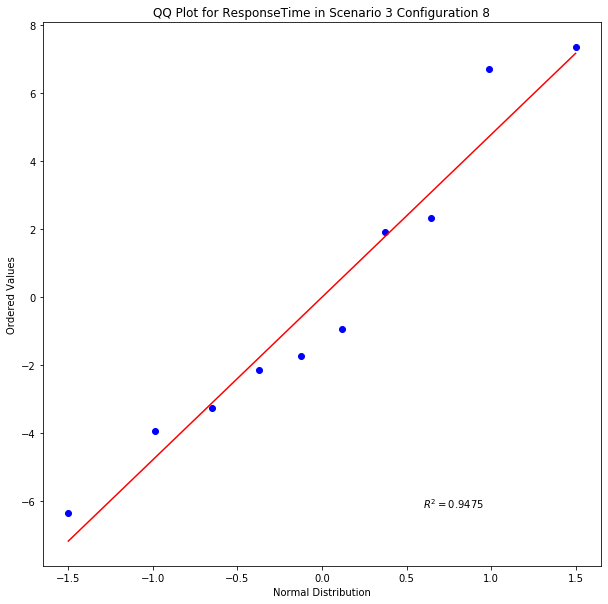

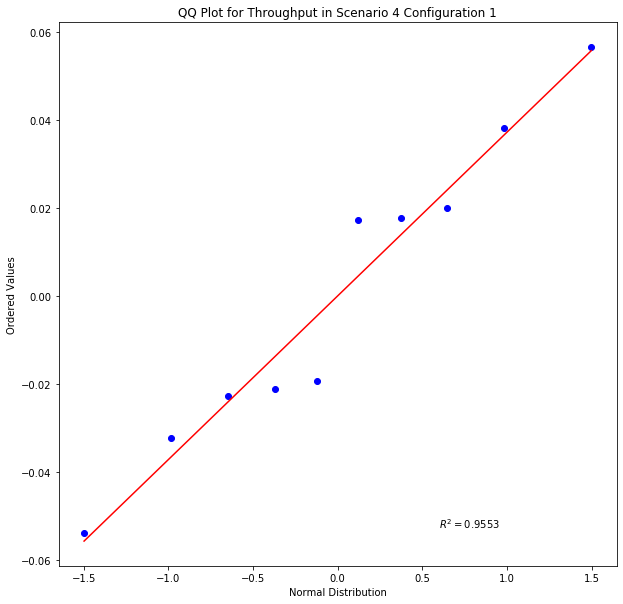

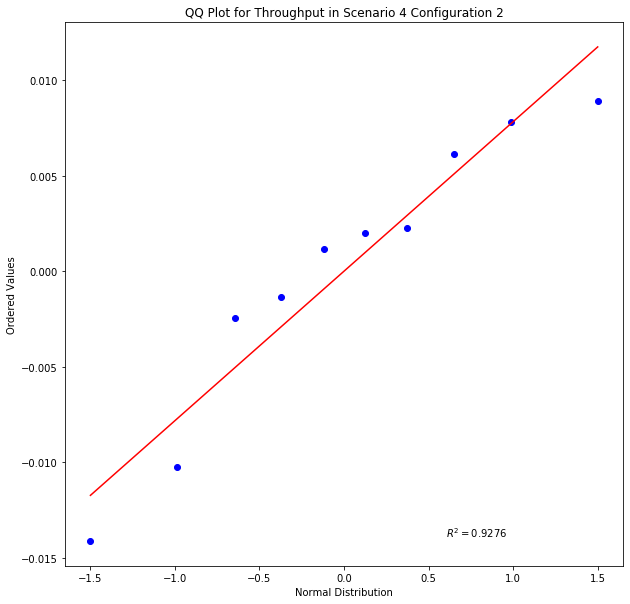

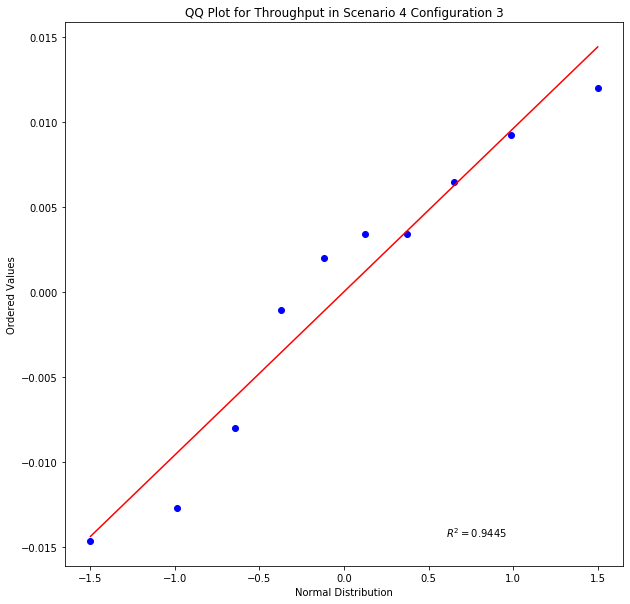

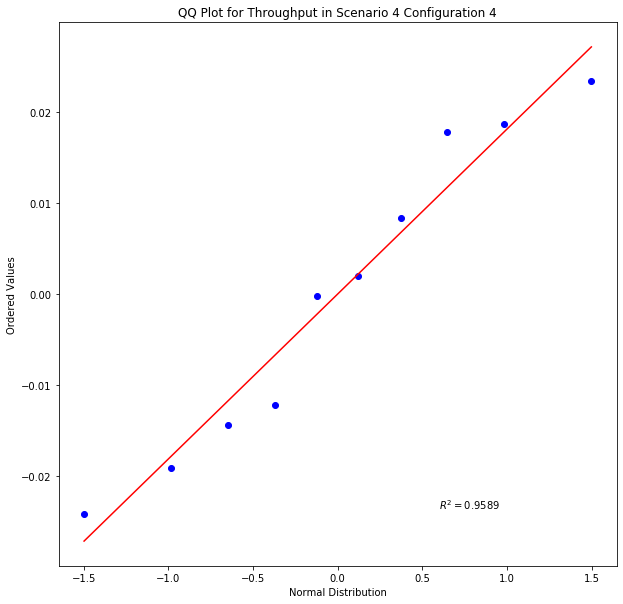

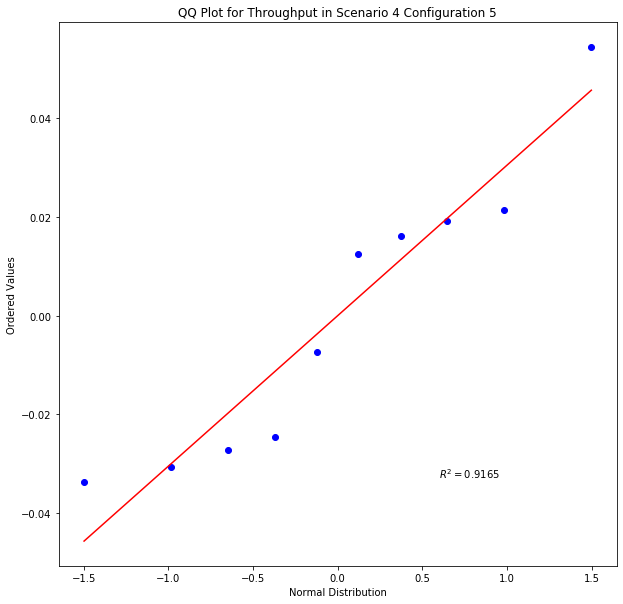

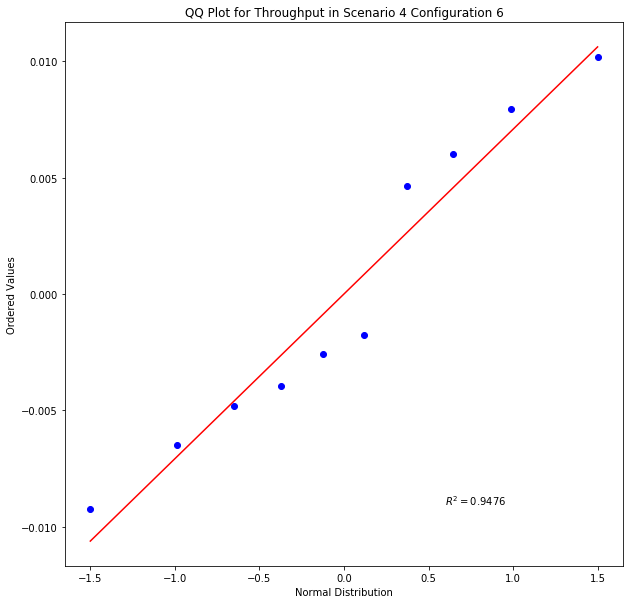

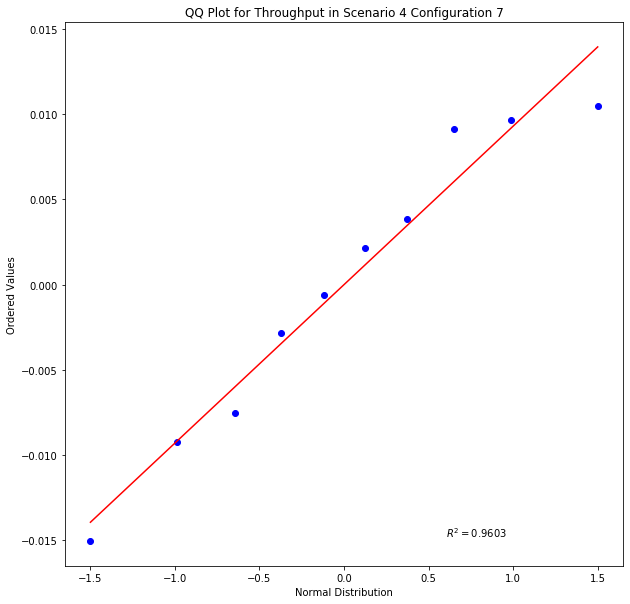

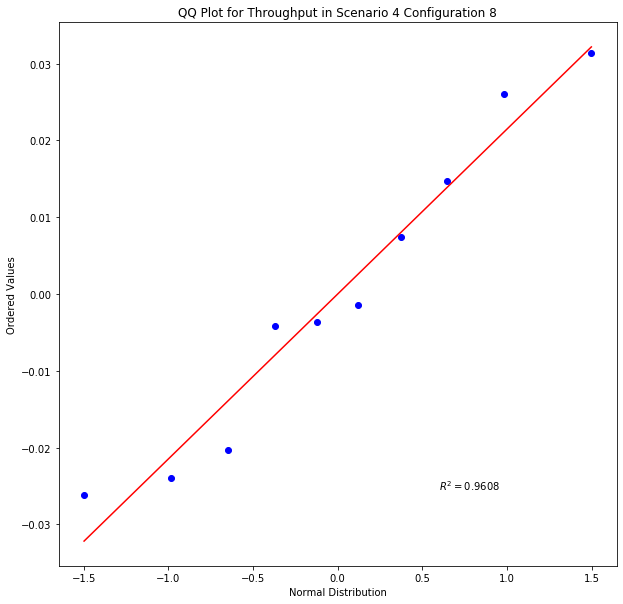

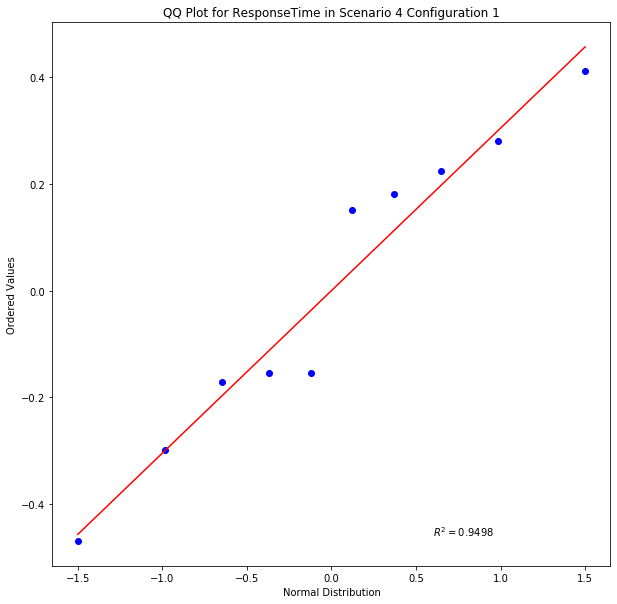

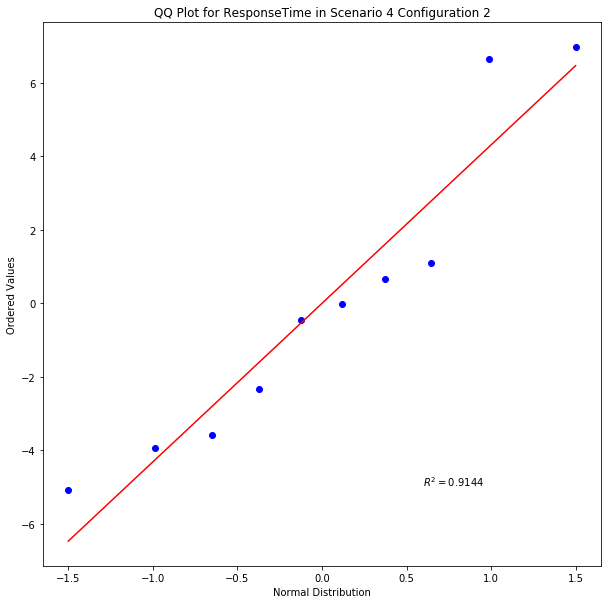

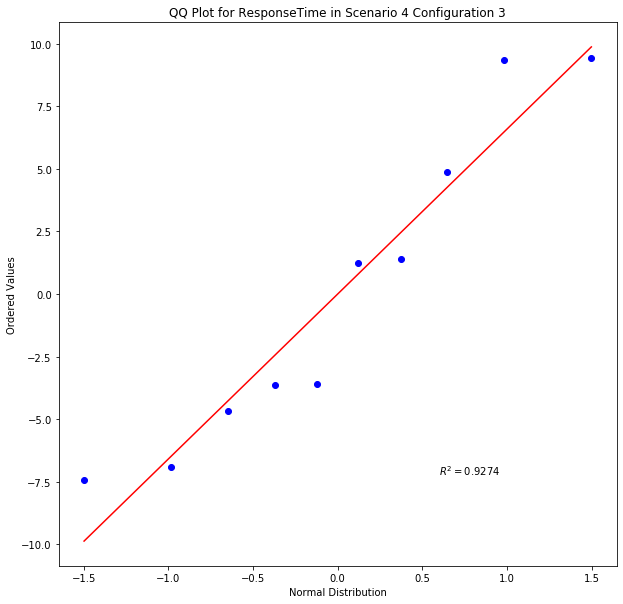

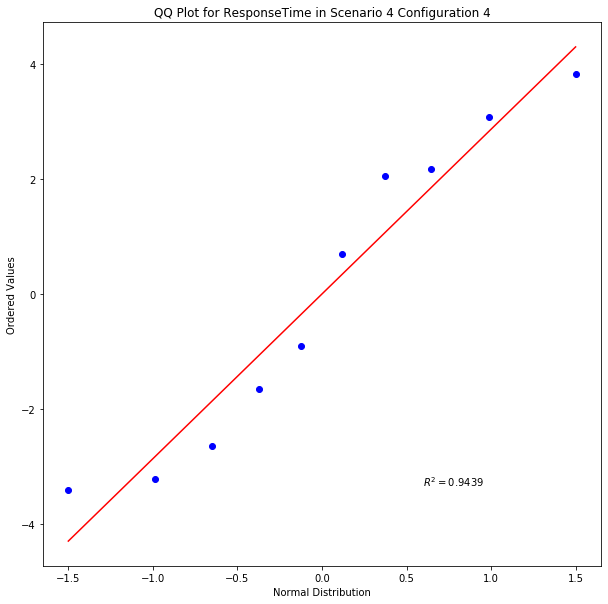

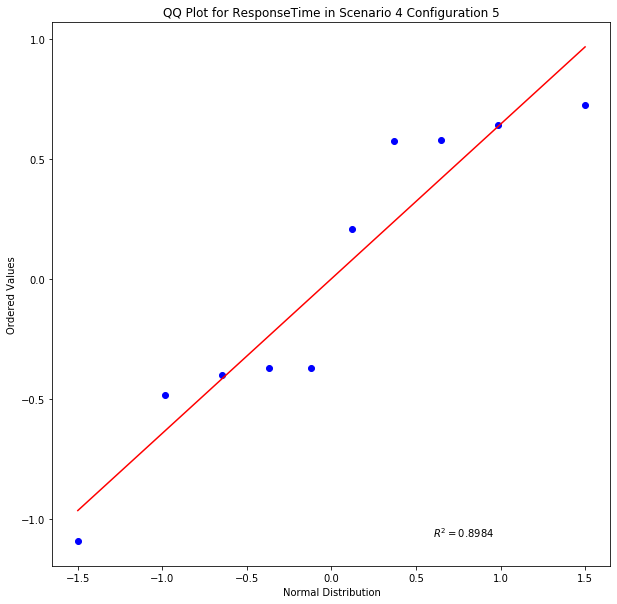

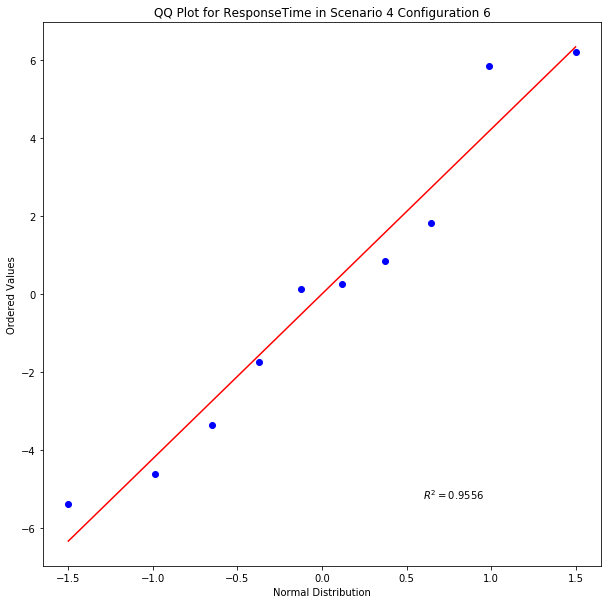

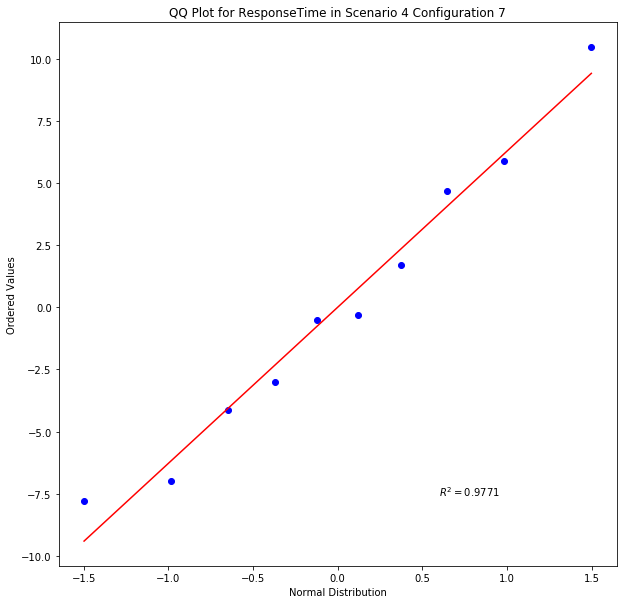

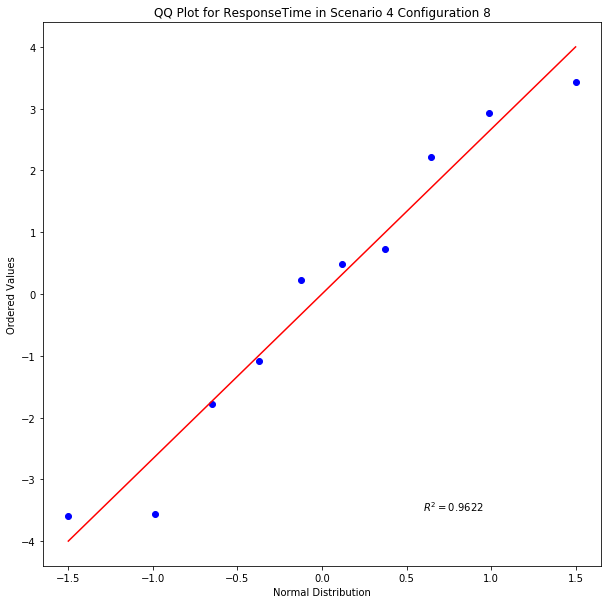

In [22]:
#Reading the excel file
residualsExcel = pd.ExcelFile("../excel/2kr.xlsx")


for sheet in residualsExcel.sheet_names:
    if(sheet!="Foglio9"):
         
        #Getting the excel sheet    
        residualsDataframe = pd.read_excel("../excel/2kr.xlsx", sheet_name=sheet)

        #Resize the dataframe with the interested columns (iterations) and rows (configurations)
        residualsDataframe=residualsDataframe.loc[0:7,'y1-ym':'y10-ym']
        #print(residualsDataframe)
                        
        #Splitting the excel sheet name for get the name of the scenario and the performance index analyzed
        (performance,scenario)=sheet.split('_')
        
        #For every residual plotting the QQPlot with the correspondent label
        for configIndex,residual in enumerate(residualsDataframe.values):
                        
            #Set the dimensions of the plot
            plt.figure(figsize=(10,10))

            qqPlot = stats.probplot(list(residual), dist='norm',plot=plt,rvalue=True)
            plt.title("QQ Plot for "+performance+" in "+"Scenario "+scenario+ " Configuration "+str(configIndex+1))
            plt.xlabel("Normal Distribution")

        